# Canadian Top 5 Bank's Stock Analysis

#### Author: Aniruddha Shringarpure

# Imports

In [129]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#plotly
import plotly
import cufflinks as cf
cf.go_offline()

# Data

Getting data using pandas datareader to get the stock information for the following banks:
- Royal Bank of Canada
- Bank of Montreal
- Canadian Imperial Bank of Commerce
- The Bank of Nova Scotia
- TD Canada Trust


In [4]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,7,1)

In [65]:
#RBC
RBC = data.DataReader('RY.TO','yahoo',start,end)
#BMO
BMO = data.DataReader('BMO.TO','yahoo',start,end)
#CIBC
CIBC = data.DataReader('CM.TO','yahoo',start,end)
#Scotia Bank
BNS = data.DataReader('BNS.TO','yahoo',start,end)
#TD
TD = data.DataReader('TD.TO','yahoo',start,end)

In [78]:
#CIBC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,77.680000,76.150002,76.150002,77.449997,604200.0,37.249432
2006-01-04,77.980003,77.099998,77.099998,77.980003,521800.0,37.504326
2006-01-05,78.739998,77.750000,77.980003,78.599998,809800.0,37.802502
2006-01-06,78.980003,78.510002,78.709999,78.980003,638500.0,37.985279
2006-01-09,79.320000,78.519997,78.989998,78.900002,933700.0,37.946804
...,...,...,...,...,...,...
2020-06-24,93.699997,91.959999,93.620003,92.639999,2970100.0,91.186119
2020-06-25,93.339996,91.699997,92.050003,93.029999,2001800.0,91.570000
2020-06-26,91.360001,89.419998,91.269997,90.129997,3992500.0,90.129997


In [67]:
tickers = ['RBC','BMO','CIBC','BNS','TD']

In [68]:
bank_stocks = pd.concat([RBC,BMO,CIBC,BNS,TD],axis=1,keys=tickers)

In [69]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [77]:
#bank_stocks.head(5)

Bank Ticker        RBC                                                         \
Stock Info        High        Low       Open      Close     Volume  Adj Close   
Date                                                                            
2006-01-03   45.875000  45.139999  45.375000  45.860001  2997000.0  25.878578   
2006-01-04   46.355000  45.709999  45.799999  46.285000  2444800.0  26.118410   
2006-01-05   46.160000  45.785000  46.014999  46.000000  2430200.0  25.957569   
2006-01-06   46.095001  45.700001  45.924999  45.700001  1568200.0  25.788294   
2006-01-09   46.035000  45.375000  45.549999  45.455002  2591600.0  25.650036   

Bank Ticker        BMO                                   ...        BNS  \
Stock Info        High        Low       Open      Close  ...       Open   
Date                                                     ...              
2006-01-03   66.480003  64.650002  64.660004  66.370003  ...  46.369999   
2006-01-04   67.120003  65.849998  66.169998  66.879997  ...  46.799999   
2006-01-05   67.440002  66.620003  66.620003  66.980003  ...  46.950001   
2006-01-06   67.000000  66.430000  67.000000  66.599998  ...  46.910000   
2006-01-09   66.669998  66.029999  66.209999  66.150002  ...  46.490002   

Bank Ticker                                          TD                        \
Stock Info       Close     Volume  Adj Close       High        Low       Open   
Date                                                                            
2006-01-03   46.750000  2066700.0  25.201324  31.035000  30.504999  30.504999   
2006-01-04   46.919998  1964300.0  25.292957  31.334999  30.850000  30.885000   
2006-01-05   46.849998  1439500.0  25.255228  31.180000  30.910000  31.010000   
2006-01-06   46.450001  1757600.0  25.039589  31.225000  30.900000  31.075001   
2006-01-09   46.049999  2639100.0  24.823965  31.250000  30.879999  31.000000   

Bank Ticker                                   
Stock Info       Close     Volume  Adj Close  
Date                                          
2006-01-03   31.035000  2229000.0  18.207762  
2006-01-04   31.150000  2308600.0  18.275240  
2006-01-05   31.150000  1971000.0  18.275240  
2006-01-06   31.000000  1581400.0  18.187231  
2006-01-09   31.110001  2565800.0  18.251766  

[5 rows x 30 columns]

# EDA

#### Max close price for each bank's stock thoughout the time period

In [72]:
#for tick in tickers:
#    print(tick,round(bank_stocks[tick]['Close'].max(),2))
round(bank_stocks.xs(key='Close',axis=1,level='Stock Info').max(),2)

Bank Ticker
RBC     109.36
BMO     108.32
CIBC    124.59
BNS      84.87
TD       79.73
dtype: float64

#### Calculating Returns

In [73]:
returns = pd.DataFrame()

In [74]:
 for tick in tickers:
        returns[tick+ ' Returns'] = bank_stocks[tick]['Close'].pct_change()

In [75]:
returns.head(5)

,RBC Returns,BMO Returns,CIBC Returns,BNS Returns,TD Returns
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.009267,0.007684,0.006843,0.003636,0.003705
2006-01-05,-0.006157,0.001495,0.007951,-0.001492,0.000000
2006-01-06,-0.006522,-0.005673,0.004835,-0.008538,-0.004815
2006-01-09,-0.005361,-0.006757,-0.001013,-0.008611,0.003548


##### Returns pairplot 

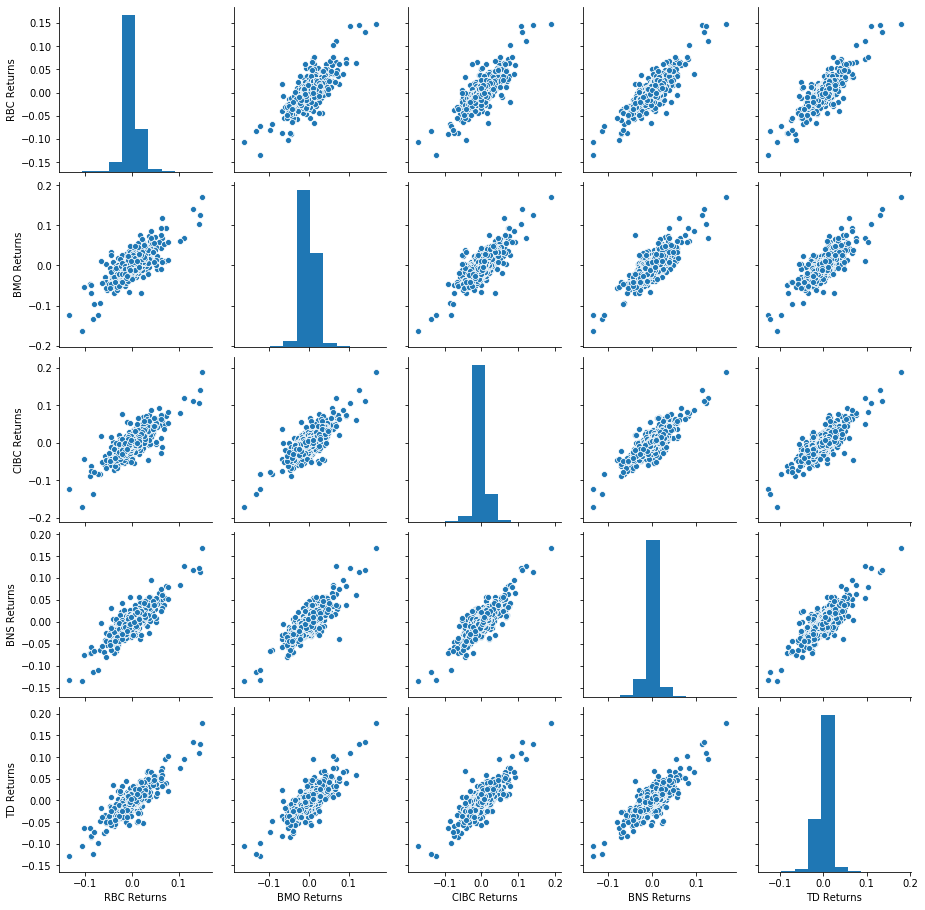

In [81]:
sns.pairplot(returns[1:])

##### Worst single day returns

In [83]:
returns.idxmin()

RBC Returns    2008-11-20
BMO Returns    2020-03-12
CIBC Returns   2020-03-12
BNS Returns    2020-03-12
TD Returns     2008-11-20
dtype: datetime64[ns]

RBC and TD share the same worst date while BMO, CIBC and Scotiabank share the same

[2008-11-20 ](https://money.cnn.com/2008/11/20/markets/markets_newyork/index.htm?postversion=2008112018)

[2020-03-12](https://www.bloomberg.com/news/articles/2020-03-12/bank-of-canada-follows-fed-with-market-liquidity-measures)

##### Best single day returns

In [84]:
returns.idxmax()

RBC Returns    2020-03-13
BMO Returns    2020-03-13
CIBC Returns   2020-03-13
BNS Returns    2020-03-13
TD Returns     2020-03-13
dtype: datetime64[ns]

[2020-03-13](https://www.nationalobserver.com/2020/03/13/news/bank-canada-pumps-7b-financial-system-ease-impact-covid-19)

The Bank of Canada responded with a $7-billion promise to the country's banking system and an expansion of its bond buy-back program, making moves it hasn't used since the financial crisis and downturn just over a decade ago.

##### Riskiest stock (Standard Deviation) - Overall

In [86]:
returns.std()

RBC Returns     0.014684
BMO Returns     0.015073
CIBC Returns    0.015539
BNS Returns     0.014616
TD Returns      0.014332
dtype: float64

CIBC edges out BMO being the riskiest stock of the top 5 banks overall.

##### Riskiest stock (Standard Deviation) - 2020

In [95]:
returns.loc['2020-01-01':].std()

RBC Returns     0.032034
BMO Returns     0.039401
CIBC Returns    0.036356
BNS Returns     0.034909
TD Returns      0.035141
dtype: float64

BMO edges out CIBC being the riskiest stock of the top 5 banks in 2020.

# Visualizations

##### Distribution of 2020 returns for BMO

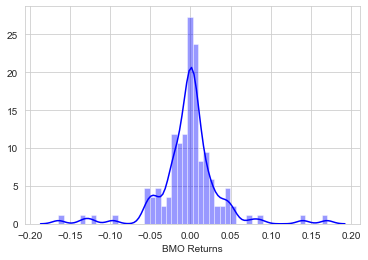

In [118]:
sns.distplot(returns.loc['2020-01-01':]['BMO Returns'], color='blue',bins=50)

##### Distribution of 2020 returns for CIBC

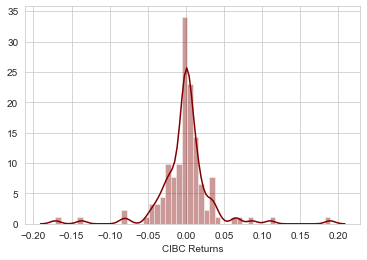

In [119]:
sns.distplot(returns.loc['2020-01-01':]['CIBC Returns'], color='maroon',bins=50)

##### DIstribution of 2020 returns for TD Bank

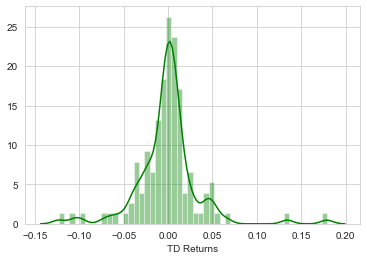

In [120]:
sns.distplot(returns.loc['2020-01-01':]['TD Returns'], color='green',bins=50)

##### DIstribution of 2020 returns for ScotiaBank

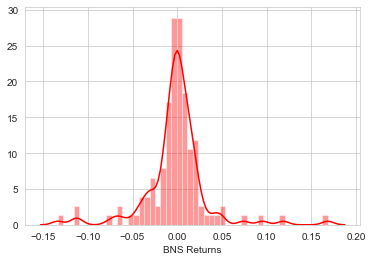

In [121]:
sns.distplot(returns.loc['2020-01-01':]['BNS Returns'], color='red',bins=50)

##### DIstribution of 2020 returns for RBC

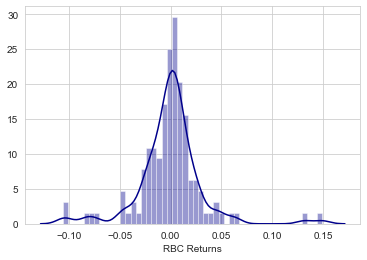

In [122]:
sns.distplot(returns.loc['2020-01-01':]['RBC Returns'], color='darkblue',bins=50)

##### Closing Price for the banks - Overall

In [130]:
#for tick in tickers:
#    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
#plt.legend()

Using matplotlib

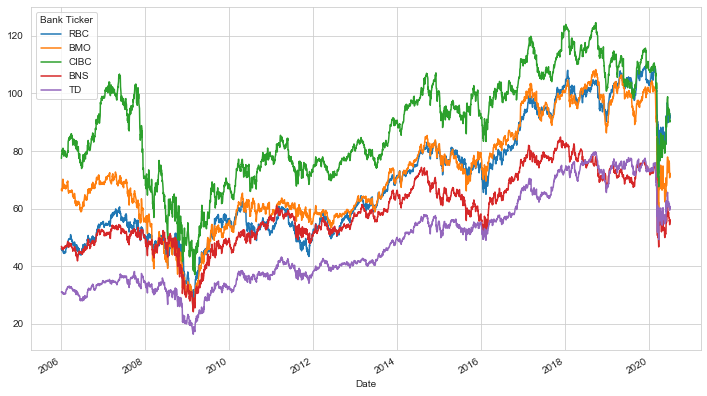

In [127]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,7))

Using plotly

In [142]:
size = cf.Layout(height=500,width=1000)
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot(layout=size.to_plotly_json())

##### Candle Plots - 2020

In [189]:
RBC20 = RBC[['Open','High','Low','Close']].loc['2020-01-01':]
RBC20.iplot(kind='candle',title="RBC 2020")

In [190]:
BNS20 = BNS[['Open','High','Low','Close']].loc['2020-01-01':]
BNS20.iplot(kind='candle',title="Scotiabank 2020")

In [191]:
BMO20 = BMO[['Open','High','Low','Close']].loc['2020-01-01':]
BMO20.iplot(kind='candle',title="BMO 2020")

In [192]:
CIBC20 = CIBC[['Open','High','Low','Close']].loc['2020-01-01':]
CIBC20.iplot(kind='candle',title="CIBC 2020")

In [193]:
TD20 = TD[['Open','High','Low','Close']].loc['2020-01-01':]
TD20.iplot(kind='candle',title="TD 2020")

##### 30 Day Moving Averages - Year 2020 

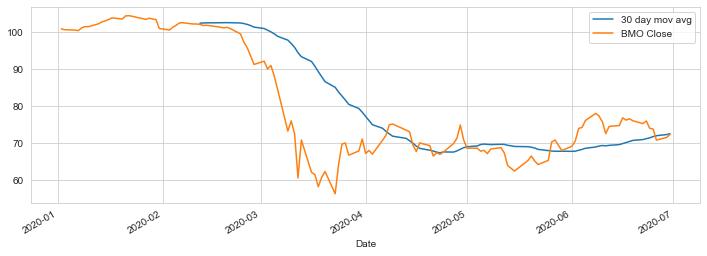

In [169]:
plt.figure(figsize=(12,4))
BMO['Close'].loc['2020-01-01':].rolling(window=30).mean().plot(label='30 day mov avg')
BMO['Close'].loc['2020-01-01':].plot(label='BMO Close')
plt.legend()

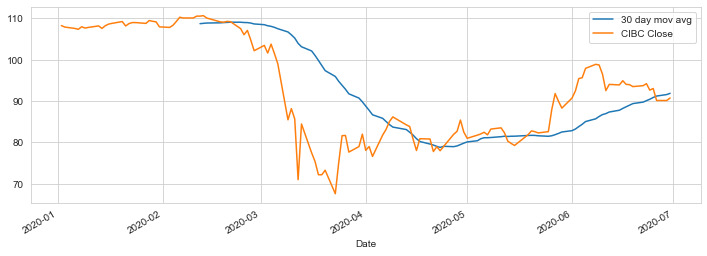

In [170]:
plt.figure(figsize=(12,4))
CIBC['Close'].loc['2020-01-01':].rolling(window=30).mean().plot(label='30 day mov avg')
CIBC['Close'].loc['2020-01-01':].plot(label='CIBC Close')
plt.legend()

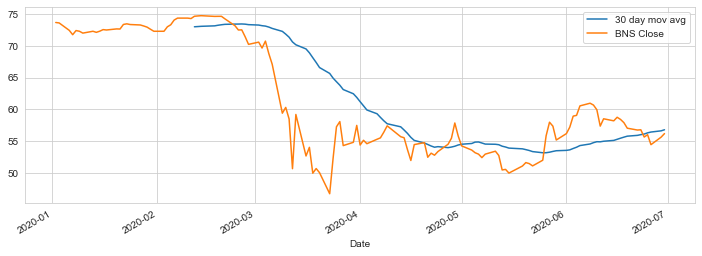

In [171]:
plt.figure(figsize=(12,4))
BNS['Close'].loc['2020-01-01':].rolling(window=30).mean().plot(label='30 day mov avg')
BNS['Close'].loc['2020-01-01':].plot(label='BNS Close')
plt.legend()

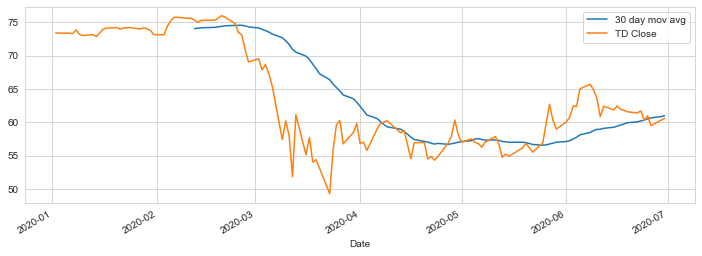

In [172]:
plt.figure(figsize=(12,4))
TD['Close'].loc['2020-01-01':].rolling(window=30).mean().plot(label='30 day mov avg')
TD['Close'].loc['2020-01-01':].plot(label='TD Close')
plt.legend()

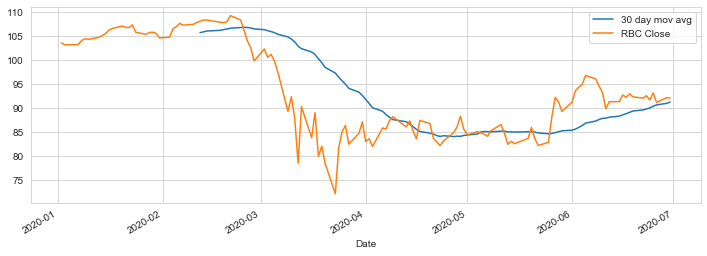

In [173]:
plt.figure(figsize=(12,4))
RBC['Close'].loc['2020-01-01':].rolling(window=30).mean().plot(label='30 day mov avg')
RBC['Close'].loc['2020-01-01':].plot(label='RBC Close')
plt.legend()

##### Correlation between stocks Close Price

Heat Map

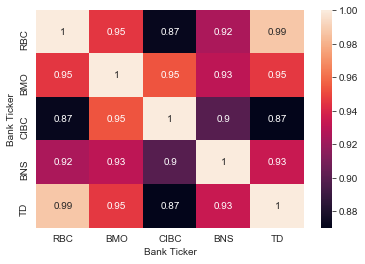

In [176]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Cluster Map

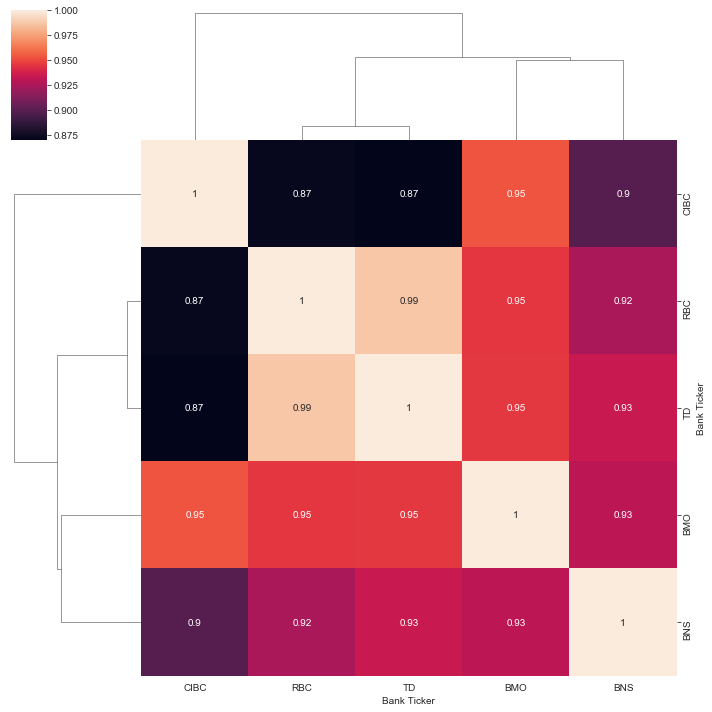

In [177]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)